In [18]:
import pandas as pd
import matplotlib.pyplot as plt;plt.rcdefaults()
from googletrans import Translator
import googletrans
data = pd.read_csv("amazon.csv", thousands=".")

In [4]:
data.shape()

(6454, 5)

Data Cleaning

In [5]:
data.head()



,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01


In [6]:
data.describe(include="all")

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,2004-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,522.696312,NaN
std,5.746654,NaN,NaN,1554.846486,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,9.000000,NaN
50%,2007.000000,NaN,NaN,54.000000,NaN
75%,2012.000000,NaN,NaN,269.000000,NaN


In [7]:
data.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [8]:
import numpy as np
data = data.replace(0, np.nan)
data2 = data.dropna(subset=['number'])

In [10]:
data2.describe(include= "all")
forest_fire_per_month = data2.groupby('month')['number'].sum()
print(forest_fire_per_month)

month
Abril          28364.0
Agosto        740841.0
Dezembro      152596.0
Fevereiro      30952.0
Janeiro        52587.0
Julho         217620.0
Junho         111405.0
Maio           46083.0
Março          35118.0
Novembro      312326.0
Outubro       629665.0
Setembro     1015925.0
Name: number, dtype: float64


In [12]:
months_unique = list(data.month.unique())
forest_fire_per_month = forest_fire_per_month.reindex(months_unique, axis=0)


In [13]:
forest_fire_per_month = forest_fire_per_month.to_frame()
forest_fire_per_month.head()

,number
month,
Janeiro,52587.0
Fevereiro,30952.0
Março,35118.0
Abril,28364.0
Maio,46083.0


In [14]:
forest_fire_per_month.reset_index(level=0, inplace=True)
forest_fire_per_month.head()

,month,number
0,Janeiro,52587.0
1,Fevereiro,30952.0
2,Março,35118.0
3,Abril,28364.0
4,Maio,46083.0


In [20]:
translator = Translator() #create an object of Translator
for month in months_unique:
    detected = translator.detect(month)
    translated = translator.translate(month)
    print(detected)
    print(translated)
    print("...")

Detected(lang=en, confidence=0.6906946)
Translated(src=en, dest=en, text=Janeiro, pronunciation=Janeiro, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=February, pronunciation=February, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=March, pronunciation=March, extra_data="{'translat...")
...
Detected(lang=es, confidence=0.47058824)
Translated(src=es, dest=en, text=April, pronunciation=April, extra_data="{'translat...")
...
Detected(lang=pt, confidence=0.75)
Translated(src=pt, dest=en, text=May, pronunciation=May, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=June, pronunciation=June, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=July, pronunciation=July, extra_data="{'translat...")
...
Detected(lang=es, confidence=0.37796605)
Translated(src=es, dest=en, text=August, pronunciation

In [23]:
translator2 = Translator() #create a new object of Translator. #cannot use the one defined before as that contains the latest #month’s calculated value
for i, m in enumerate(forest_fire_per_month['month']):
    translated = translator2.translate(m)
    month1 = translated.text
    forest_fire_per_month.at[i, 'month'] = month1
    print(forest_fire_per_month)

        month     number
0     Janeiro    52587.0
1   Fevereiro    30952.0
2       Março    35118.0
3       Abril    28364.0
4        Maio    46083.0
5       Junho   111405.0
6       Julho   217620.0
7      Agosto   740841.0
8    Setembro  1015925.0
9     Outubro   629665.0
10   Novembro   312326.0
11   Dezembro   152596.0
       month     number
0    Janeiro    52587.0
1   February    30952.0
2      Março    35118.0
3      Abril    28364.0
4       Maio    46083.0
5      Junho   111405.0
6      Julho   217620.0
7     Agosto   740841.0
8   Setembro  1015925.0
9    Outubro   629665.0
10  Novembro   312326.0
11  Dezembro   152596.0
       month     number
0    Janeiro    52587.0
1   February    30952.0
2      March    35118.0
3      Abril    28364.0
4       Maio    46083.0
5      Junho   111405.0
6      Julho   217620.0
7     Agosto   740841.0
8   Setembro  1015925.0
9    Outubro   629665.0
10  Novembro   312326.0
11  Dezembro   152596.0
       month     number
0    Janeiro    52587.0
1  

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

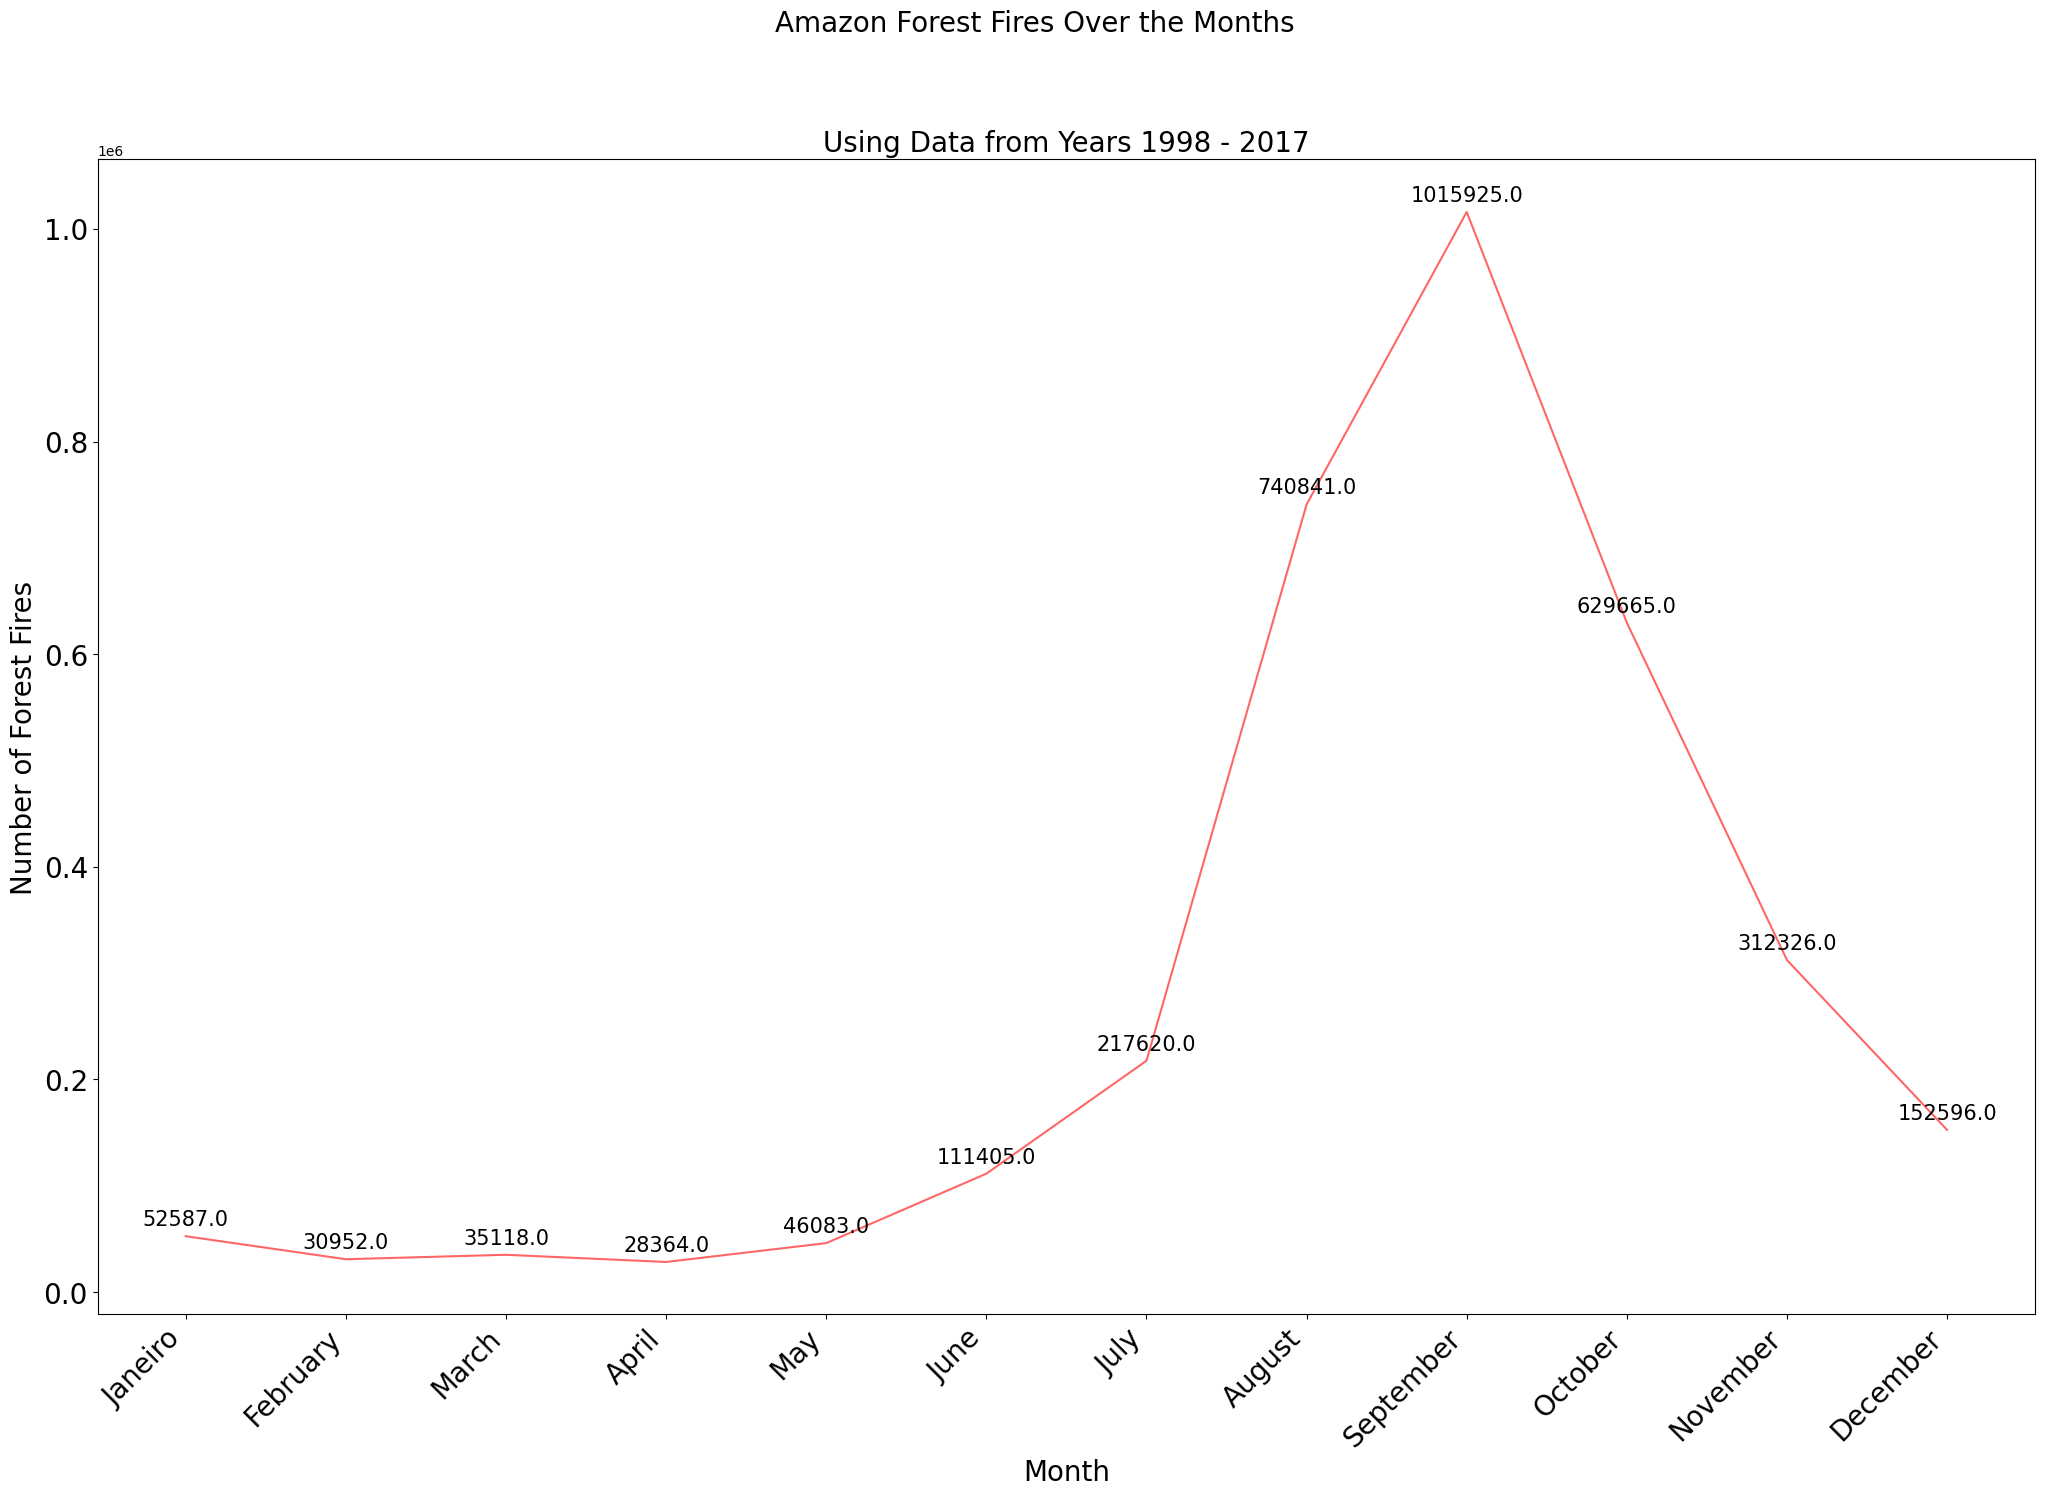

In [30]:
plt.figure(figsize=(25, 15)) #specify width and height
#plt.bar(x-values, y-values)
plt.plot(
forest_fire_per_month['month'],
forest_fire_per_month['number'],
color = (1.0,0.0,0.0,0.6))
#use .suptitle for the actual title and .title for the subheading
plt.suptitle('Amazon Forest Fires Over the Months', fontsize=20)
plt.title('Using Data from Years 1998 - 2017', fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Number of Forest Fires', fontsize=20)
#plt.text(x-coordinate, y-coordinate, valueOfText, alignmnet)
#this adds text at the top of each bar indicating its value
for i, num in enumerate(forest_fire_per_month['number']):
    plt.text(
        i,
        num + 10000,
        num,
        ha='center',
        fontsize=15)
#plt.setp is to set a property on an artist object.
#plt.gca() gets the current axes (gca) instance on the current figure #matching the given keyword args.
#xticklabels and yticklabels are nothing but the values of the #lables on the x and y axis.
#The code below lets us set the fontsize and alignment of the x and #y axis tick labels
plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=20)
plt.setp(plt.gca().get_yticklabels(), fontsize=20)